In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import augmentations
import torch
from torchvision import transforms
from PIL import Image

In [2]:
def aug(image):
    """
    hyperparms
    """
    mixture_depth = -1
    mixture_width = 3
    aug_severity = 3

    preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(
          [0.5, 0.5, 0.5],
          [0.5, 0.5, 0.5])])

    aug_list = augmentations.augmentations_all
    ws = np.float32(np.random.dirichlet([1] * mixture_width))
    m = np.float32(np.random.beta(1, 1))

    mix = torch.zeros_like(preprocess(image))
    for i in range(mixture_width):
        image_aug = image.copy()
        depth = mixture_depth if mixture_depth > 0 else np.random.randint(1, 4)
        
        for _ in range(depth):
            op = np.random.choice(aug_list)
            image_aug = op(image_aug, aug_severity)
            # Preprocessing commutes since all coefficients are convex
        
        #print(preprocess(image_aug))
        mix += ws[i] * preprocess(image_aug)

    mixed = (1 - m) * preprocess(image) + m * mix
    return mixed 

In [32]:
pil_image = Image.open('/home/sks/COMPETITION/DACON/computer_vision2/dataset/testset_for_test/50005.png').convert('RGB')

In [33]:
auged_image = aug(pil_image)

AttributeError: 'NoneType' object has no attribute 'mode'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


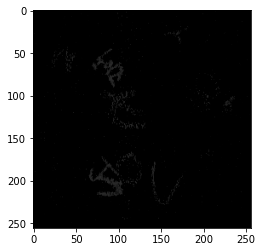

In [34]:
plt.imshow(auged_image.permute(1,2,0))

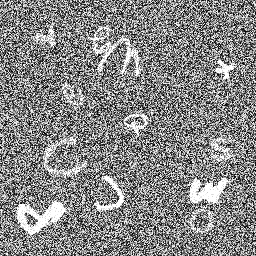

In [19]:
pil_image